In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/My Drive/Recycle project'

/content/drive/My Drive/Recycle project


In [ ]:
%ls

recyclingprojectimage/  recyclingproject.zip


In [ ]:
!unzip recyclingproject.zip

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Data preparation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2, 
                               brightness_range = (0.1, 0.5), horizontal_flip=True)

train_data = gen_train.flow_from_directory("/content/drive/My Drive/Recycle project/recycling waste",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical")

Found 8369 images belonging to 9 classes.


# Model
For the first model we will use a vgg16

In [32]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers

In [ ]:
vgg16 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)
for layer in vgg16.layers:
  layer.trainable = False
x = layers.Flatten()(vgg16.output)

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
prediction = layers.Dense(units = 9, activation="softmax")(x)

model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

result = model.fit_generator(train_data, epochs = 28, steps_per_epoch=len(train_data))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/28
262/262 [==============================] - 201s 625ms/step - loss: 2.1794 - accuracy: 0.2875
Epoch 2/28
262/262 [==============================] - 162s 618ms/step - loss: 1.5989 - accuracy: 0.4431
Epoch 3/28
262/262 [==============================] - 162s 619ms/step - loss: 1.4888 - accuracy: 0.4838
Epoch 4/28
262/262 [==============================] - 163s 621ms/step - loss: 1.3801 - accuracy: 0.5149
Epoch 5/28
262/262 [==============================] - 162s 617ms/step - loss: 1.3396 - accuracy: 0.5359
Epoch 6/28
262/262 [==============================] - 161s 614ms/step - loss: 1.2747 - accuracy: 0.5597
Epoch 7/28
262/262 [==============================] - 161s 615ms/step - loss: 1.2426 - accuracy: 0.5737
Epoch 8/28
262/262 [==============================] - 160s 612ms/step - loss: 1.1721 - accuracy: 0.5951
Epoch 9/28
262/262 [==============================] - 161s 613ms/step - loss: 1.1932 - accuracy: 0.5841
Epoch 10/28
262/262 [==============================] - 160s 609m

In [ ]:
from tensorflow.keras.preprocessing import image
output_class = ["batteries", "clothes", "e-waste", "glass", "light blubs", "metal", "organic", "paper", "plastic"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")


In [28]:
%ls


 recyclingproject.zip  'recycling waste'/   resize.jpeg


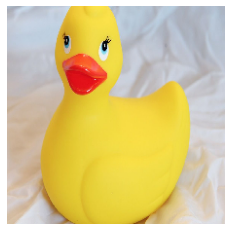

Your waste material is  plastic  with  56.15  % accuracy


In [29]:
waste_prediction("resize.jpeg")

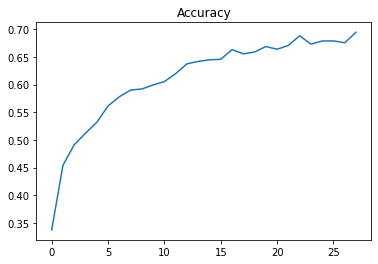

In [ ]:
plt.title("Accuracy")
plt.plot(result.history["accuracy"])
plt.show()

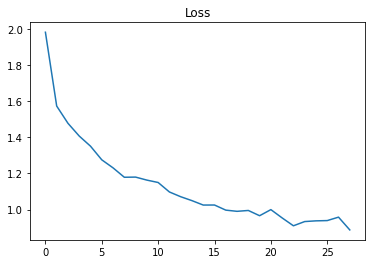

In [ ]:
plt.title("Loss")
plt.plot(result.history["loss"])
plt.show()

In [30]:
model.save("classifyWaste.h5")